Mean Squared Error: 82591.56237500001
R² Score: -0.3800223837936074


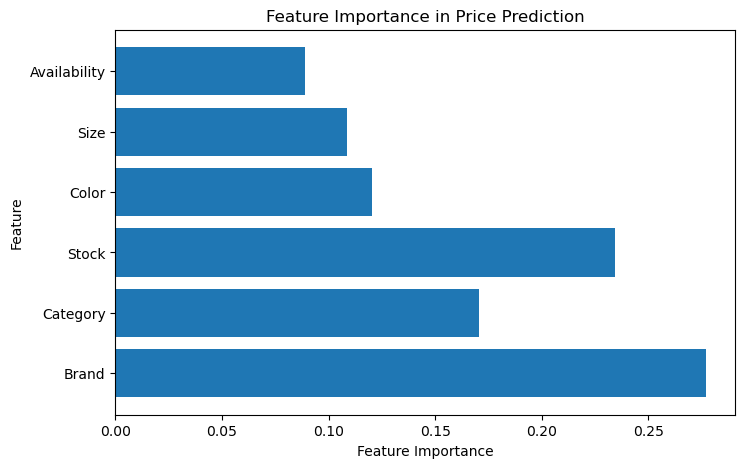

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("C:\\Users\\Harsha\\Downloads\\products-100.csv")

target = "Price"
features = ["Brand", "Category", "Stock", "Color", "Size", "Availability"]

X = df[features].copy()
y = df[target]

label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Price Prediction")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Confusion Matrix:
 [[10  0]
 [ 1  9]]


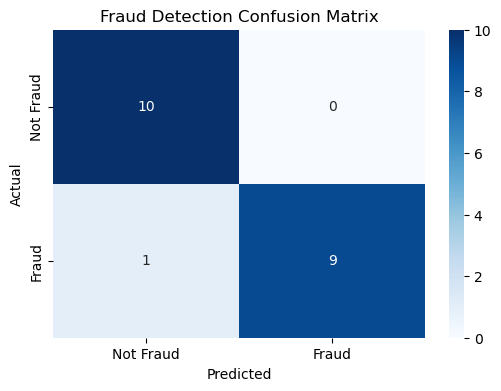

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Harsha\Downloads\products-100.csv")

df['Fraud'] = np.where((df['Price'] < 10) | (df['Price'] > 500) | (df['Availability'] == "discontinued"), 1, 0)

features = ["Brand", "Category", "Price", "Stock", "Color", "Size", "Availability"]
X = df[features].copy()
y = df['Fraud']

label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Fraud Detection Confusion Matrix")
plt.show()


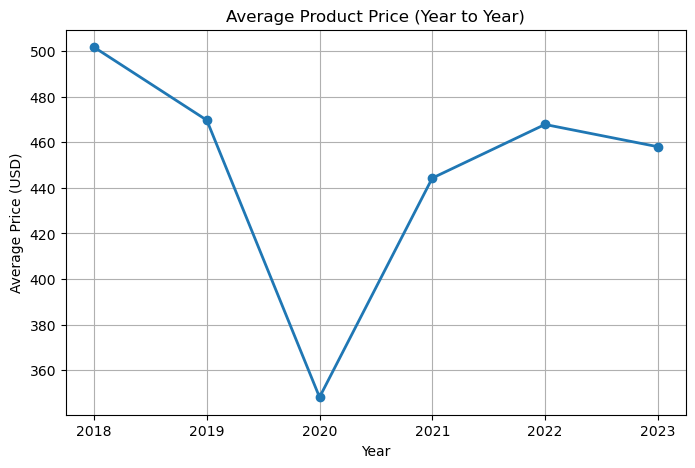

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Harsha\Downloads\products-100.csv")

np.random.seed(42)
df['Year'] = np.random.randint(2018, 2024, size=len(df))

yearly_price = df.groupby('Year')['Price'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(yearly_price['Year'], yearly_price['Price'], marker='o', linestyle='-', linewidth=2)
plt.title("Average Product Price (Year to Year)")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.grid(True)
plt.show()


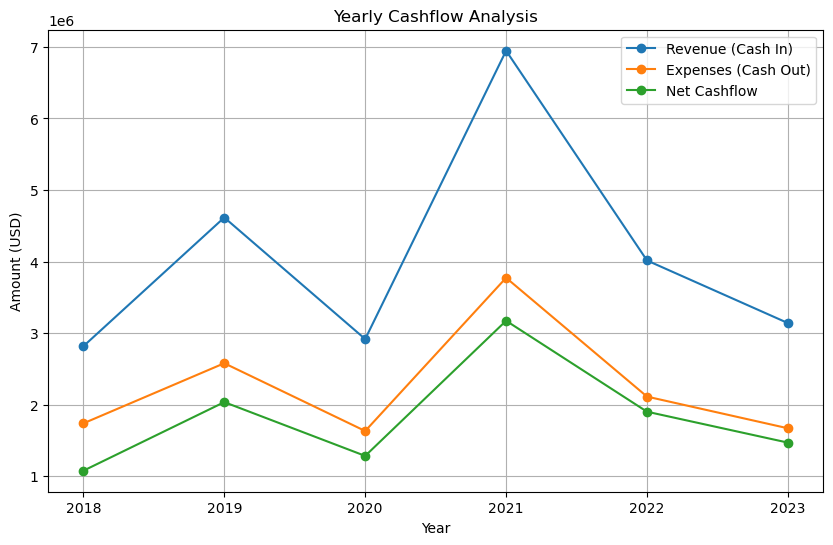

,Year,Revenue,Expenses,Net_Cashflow
0,2018,2816960,1.739416e+06,1.077544e+06
1,2019,4615836,2.579607e+06,2.036229e+06
2,2020,2917173,1.632533e+06,1.284640e+06
3,2021,6946565,3.773528e+06,3.173037e+06
4,2022,4015345,2.113176e+06,1.902169e+06
5,2023,3140704,1.670540e+06,1.470164e+06


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Harsha\Downloads\products-100.csv")

np.random.seed(42)
df['Year'] = np.random.randint(2018, 2024, size=len(df))

df['Revenue'] = df['Price'] * df['Stock']

df['Expenses'] = df['Revenue'] * np.random.uniform(0.4, 0.7, size=len(df))

df['Net_Cashflow'] = df['Revenue'] - df['Expenses']

cashflow = df.groupby('Year')[['Revenue', 'Expenses', 'Net_Cashflow']].sum().reset_index()

# Plot cashflow
plt.figure(figsize=(10,6))
plt.plot(cashflow['Year'], cashflow['Revenue'], marker='o', label="Revenue (Cash In)")
plt.plot(cashflow['Year'], cashflow['Expenses'], marker='o', label="Expenses (Cash Out)")
plt.plot(cashflow['Year'], cashflow['Net_Cashflow'], marker='o', label="Net Cashflow")
plt.title("Yearly Cashflow Analysis")
plt.xlabel("Year")
plt.ylabel("Amount (USD)")
plt.legend()
plt.grid(True)
plt.show()

cashflow
